**Brainstorm what we could plot** ♨


*Datatype*:
- [x] Most common datatye
- [x] Bulk vs single cell
- [x] Average inputsize / number of features per datatype
- [ ] Plot on levels

*Model*:
- [x] Most common model
- [x] Models per datatype 
- [x] Models per inputsize / featuresize
- [x] Trends over years (model architecture)

*Interpretability*:

- [ ] active/passive / Taxonomy / algorithm [Sunburst plot]
- [ ] Interpretability (Taxonomy) within one data type
- [ ] Interpretability (Taxonomy) within one model
- [x] Active networks: most common source of prior knowledge? [Pie chart?]
- [ ] Trends over years: 
  - [x] active vs passive



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [2]:
outPath = "figures"

In [3]:
pd_table1 = pd.read_csv("Table_2.csv")

In [27]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

# Datatypes

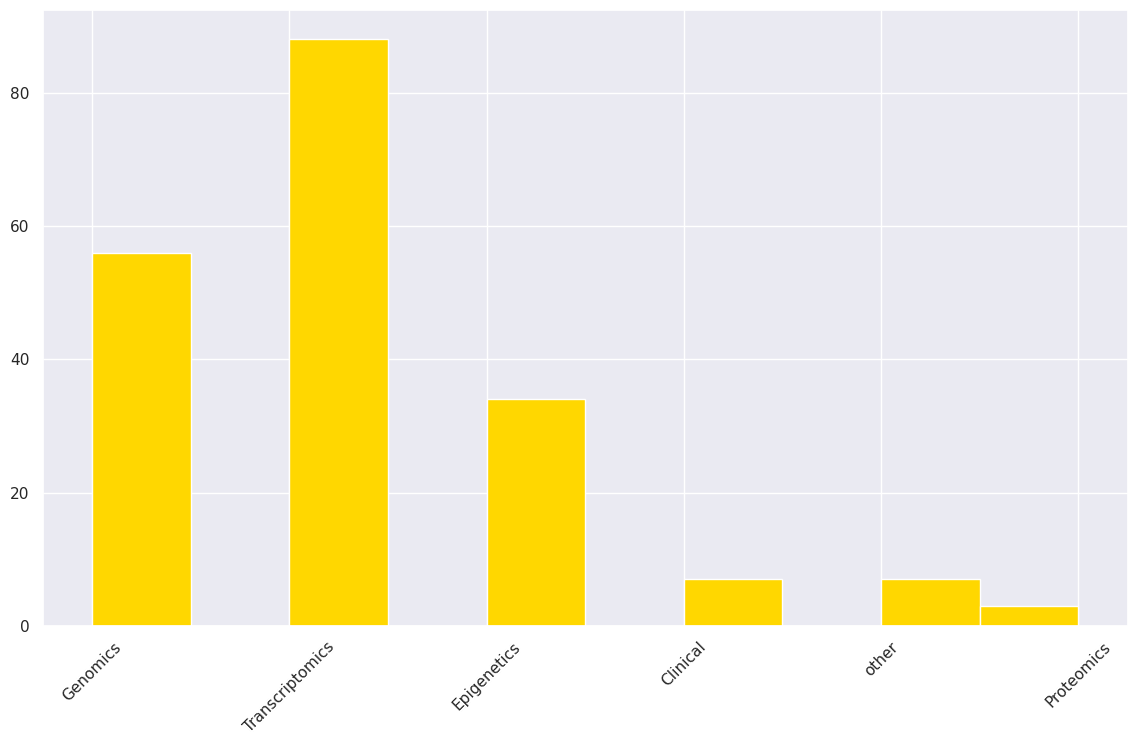

In [33]:
pd_Table_1_data_type = pd_table1.copy()
pd_Table_1_data_type = pd.concat([pd_Table_1_data_type, pd_Table_1_data_type['Data type'].str.split(', ', expand=True)], axis=1)
df_merged = pd.concat([pd_Table_1_data_type[0], pd_Table_1_data_type[1], pd_Table_1_data_type[2], pd_Table_1_data_type[3],pd_Table_1_data_type[4],pd_Table_1_data_type[5]], ignore_index=True)
df_merged_cat = df_merged.dropna().replace(data_categories)

plt.figure(figsize=(14,8))
plt.hist(df_merged_cat, color="gold")
plt.xticks(rotation=45)
plt.show()

In [34]:
pd_Table_1_data_type = pd_table1.copy()
pd_Table_1_data_type = pd.concat([pd_Table_1_data_type, pd_Table_1_data_type['Data type'].str.split(', ', expand=True)], axis=1)
df_merged = pd.concat([pd_Table_1_data_type[0], pd_Table_1_data_type[1], pd_Table_1_data_type[2], pd_Table_1_data_type[3],pd_Table_1_data_type[4],pd_Table_1_data_type[5]], ignore_index=True)

df = pd.DataFrame(df_merged.value_counts())
df = df.loc[list(data_categories.keys()),]
df["cat"] = data_categories.values()

cat_list = []
labels_list = []
for cat in df["cat"].unique():
    cat_list.append(df[df["cat"] == cat][0].astype("int64").tolist())
    labels_list.append(df[df["cat"] == cat].index.tolist())

print(cat_list)
print(labels_list)

[[21, 15, 9, 3, 2, 3, 1, 1, 1], [17, 10, 4, 1, 2], [68, 20], [3], [7], [7]]
[['SNPs', 'CNV', 'SNV', 'WES', 'WGS', 'genotype', 'Copy number alterations', 'Fusions', 'Mutations'], ['CpGs (methylation)', 'miRNA', 'sc-ATAC', 'ncRNA', 'ChIP-seq'], ['mRNA (gene expression)', 'sc-transcriptomics'], ['proteome'], ['clinical'], ['other']]


In [35]:
basecol = 150

outer_colors = []
for i, cm in enumerate(["Blues", "Oranges", "Greens", "RdPu", "Reds", "Purples"]):
    cmap = plt.colormaps[cm]
    outer_colors.append(cmap(basecol))

    if i == 0:
        inner_colors = cmap(np.linspace(0.4,.9, num=len(cat_list[i])))
    else:
        inner_colors = np.append(inner_colors,  cmap(np.linspace(0.4,.9, num=len(cat_list[i]))), axis=0)

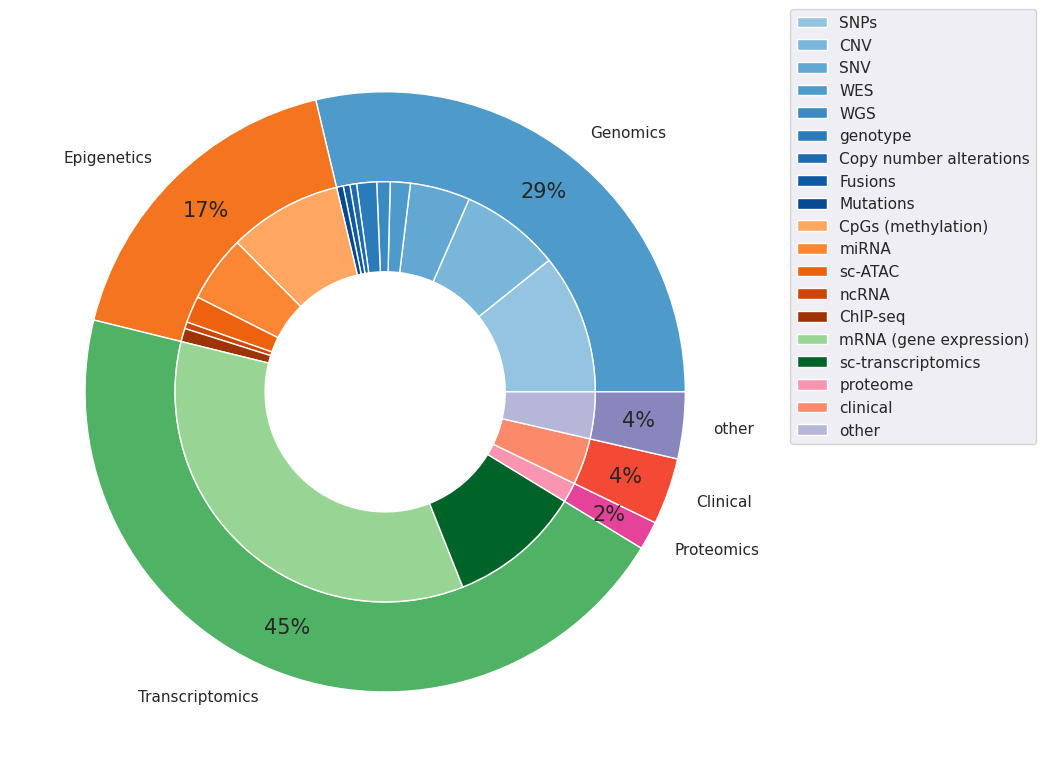

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

size = 0.3
outervals = list(map(sum, cat_list))
innervals = [j for i in cat_list for j in i]
outer_labels = df["cat"].unique().tolist()
inner_labels = [j for i in labels_list for j in i]

cmap = plt.colormaps["tab20c"]
patches_outer, texts_outer, pct = ax.pie(outervals, radius=1, colors=outer_colors, labels=outer_labels, autopct='%1.0f%%', pctdistance=.85,
       wedgeprops=dict(width=size, edgecolor='w'))
patches_inner, texts_inner = ax.pie(innervals, radius=1-size, colors=inner_colors, #labels=inner_labels, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(patches_inner, inner_labels, bbox_to_anchor=(1.03, 1.02))
fig.tight_layout()
fig.savefig(os.path.join(outPath, "datatypes_piePlot.png"), dpi=300)

## Multi-omics vs single omics

In [41]:
df3 = pd_table1[["Data type"]].copy()
df3["Data type"] = df3['Data type'].str.split(', ')
df3["count"] = list(map(len,df3["Data type"]))

TypeError: object of type 'float' has no len()

(array([64.,  0., 22.,  0.,  4.,  0.,  4.,  0.,  1.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

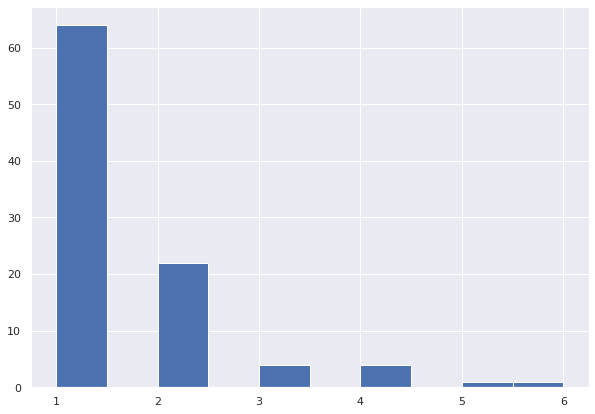

In [130]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(df3["count"])

In [135]:
df3[df3["count"]==2]["Data type"].value_counts()

[mRNA (gene expression), miRNA]                 4
[SNPs, mRNA (gene expression)]                  3
[CpGs (methylation), mRNA (gene expression)]    2
[clinical, mRNA (gene expression)]              2
[other, sc-transcriptomics]                     2
[mRNA (gene expression), sc-transcriptomics]    2
[sc-ATAC, sc-transcriptomics]                   1
[SNPs, clinical]                                1
[CNV, mRNA (gene expression)]                   1
[CNV, SNV]                                      1
[mRNA (gene expression), other]                 1
[SNPs, genotype]                                1
[ChIP-seq, CpGs (methylation)]                  1
Name: Data type, dtype: int64

## mOdel per input size

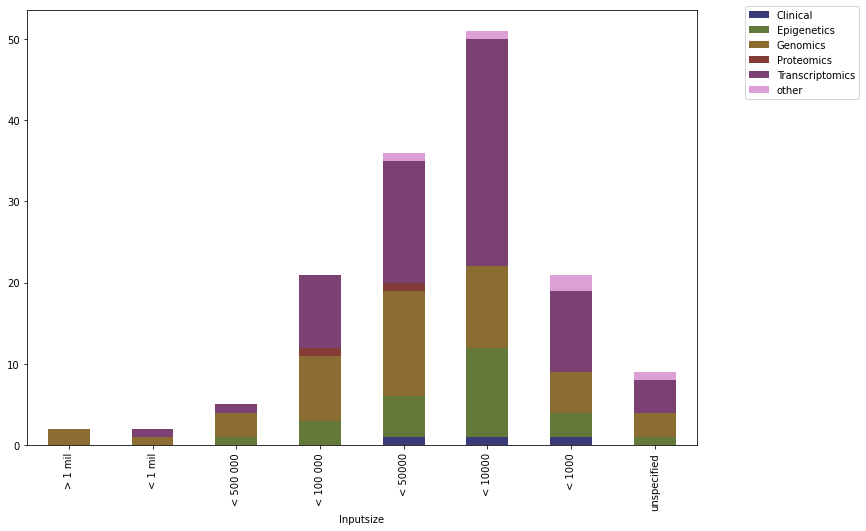

In [4]:
df3 = pd_table1[["Inputsize", "Data type"]].copy()
df3["Data type"] = df3['Data type'].str.split(', ')
df3 = df3.explode(["Data type"])

''' 
Macro labelling 
'''
df3["Data type"] = df3["Data type"].replace(data_categories)

a = df3.value_counts(normalize=False)
sizeOrder = ["> 1 mil", "< 1 mil", "< 500 000", "< 100 000", "< 50000", "< 10000", "< 1000", "unspecified"]

fig, ax = plt.subplots(figsize=(12,8))
colors = plt.cm.tab20b(np.linspace(0, 1, len(df3["Data type"].unique())))
a.unstack().loc[sizeOrder].plot.bar(stacked=True, ax=ax, color=colors)
ax.legend(bbox_to_anchor=(1.25, 1.02))

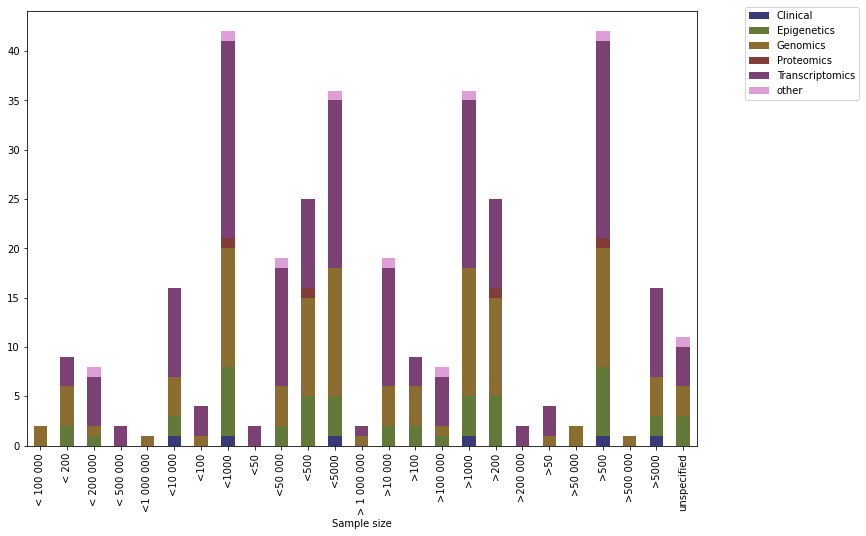

In [5]:
df4 = pd_table1[["Sample size", "Data type"]].copy()
df4["Data type"] = df4['Data type'].str.split(', ')
df4["Sample size"] = df4['Sample size'].apply(lambda x: x.replace(" & ", ", ")).str.split(', ')
df4 = df4.explode(["Data type"])
df4 = df4.explode(["Sample size"])

''' 
Macro labelling 
'''
df4["Data type"] = df4["Data type"].replace(data_categories)

a = df4.value_counts(normalize=False)
#sizeOrder = ["<1 000 000", ">500 000"]....

fig, ax = plt.subplots(figsize=(12,8))
colors = plt.cm.tab20b(np.linspace(0, 1, len(df4["Data type"].unique())))
a.unstack().plot.bar(stacked=True, ax=ax, color=colors) #.loc[sizeOrder]
ax.legend(bbox_to_anchor=(1.25, 1.02))

In [6]:
df4_num = df4[df4["Sample size"] != "unspecified"]
df4_num["Sample size"] = df4_num["Sample size"].apply(lambda x: int(x.replace("<", "").replace(">", "").replace(" ", "")))
df4_num.groupby("Data type").mean()

/tmp/ipykernel_1099/1906862697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_num["Sample size"] = df4_num["Sample size"].apply(lambda x: int(x.replace("<", "").replace(">", "").replace(" ", "")))


,Sample size
Data type,
Clinical,3750.000000
Epigenetics,10621.739130
Genomics,33374.761905
Proteomics,550.000000
Transcriptomics,30029.141104
other,45937.500000


## Levels 

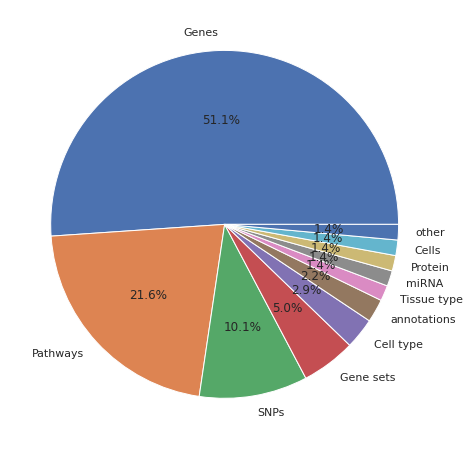

In [105]:
df = pd_table1["Which level"].copy()
df = df.str.split(", ").explode()
df = df.value_counts()

labels=df.keys().tolist()

fig, ax  = plt.subplots(figsize=(8,8))
ax.pie(df.tolist(), labels=labels, autopct='%1.1f%%')
plt.show()


# Models

## Datatype per Models

In [7]:
df = pd_table1[["Model architecture","Data type"]].copy()
df["Data type"] = df['Data type'].str.split(', ')
df["Model architecture"] = df['Model architecture'].str.split(', ')
df = df.explode(["Data type"])
df = df.explode(["Model architecture"])

df.replace(model_categories, inplace=True)
df.replace(data_categories, inplace=True)

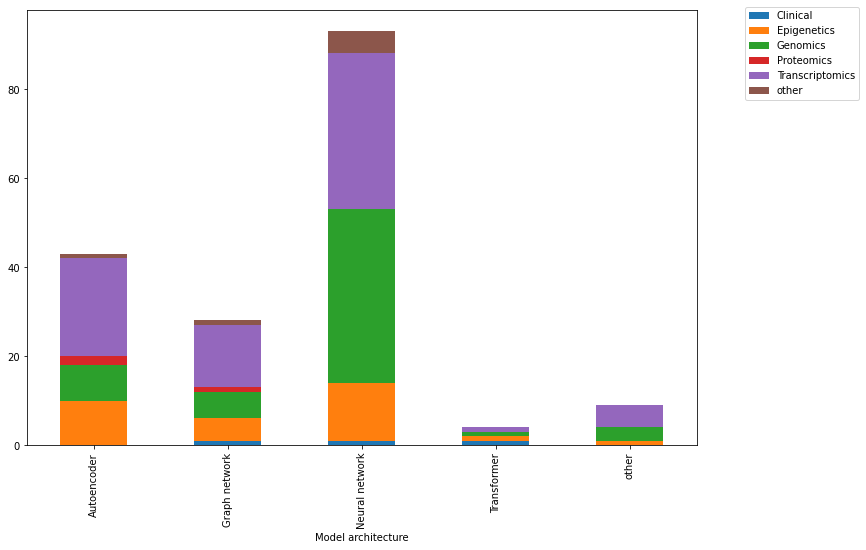

In [8]:
a = df.value_counts(normalize=False)
fig, ax = plt.subplots(figsize=(12,8))
a.unstack().plot.bar(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.25, 1.02))

In [9]:
df = pd_table1[["Data type","Model architecture"]].copy()
df["Data type"] = df['Data type'].str.split(', ')
df["Model architecture"] = df['Model architecture'].str.split(', ')
df = df.explode(["Data type"])
df = df.explode(["Model architecture"])

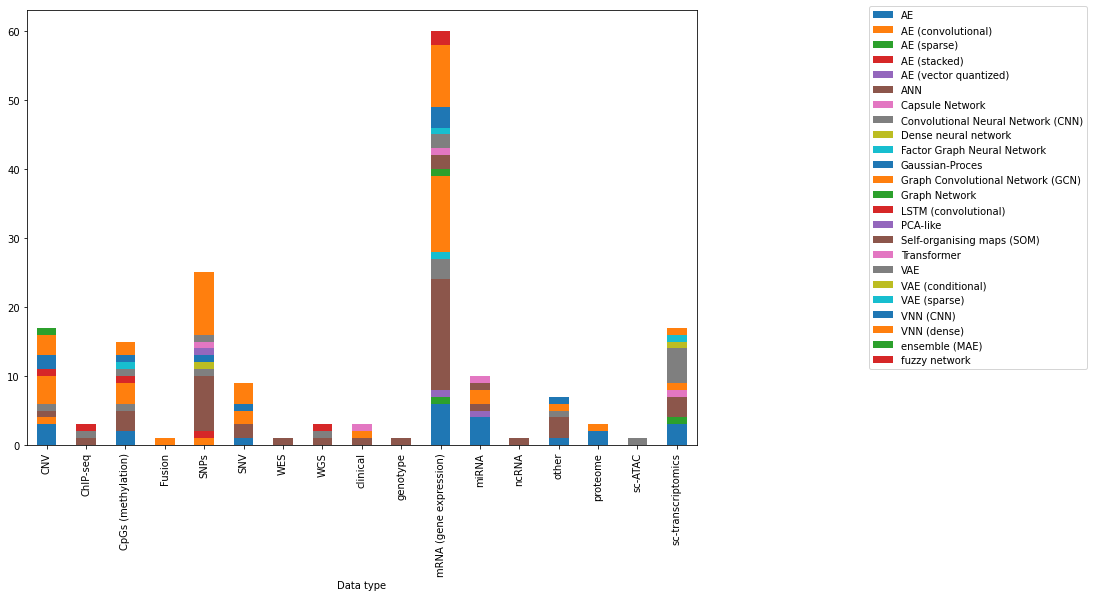

In [10]:
a = df.value_counts(normalize=False)
fig, ax = plt.subplots(figsize=(12,8))
a.unstack().plot.bar(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.25, 1.02))

## Models per inputsize

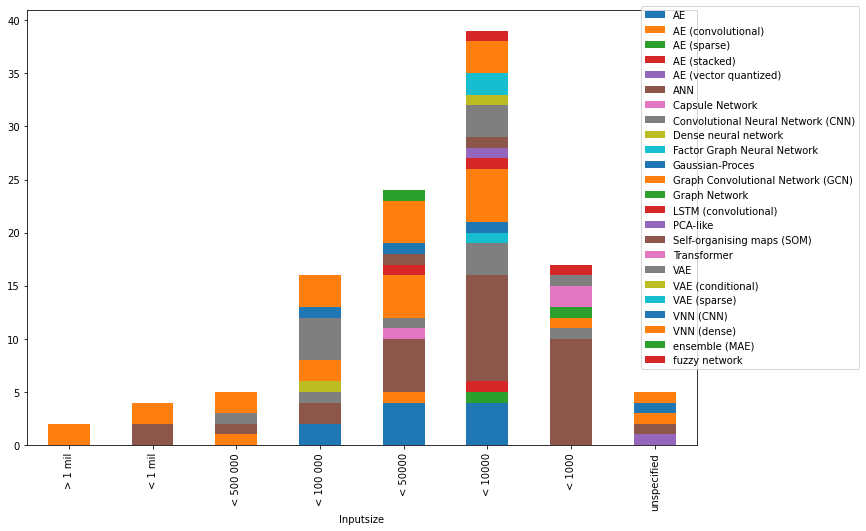

In [11]:
df3 = pd_table1[["Inputsize", "Model architecture"]].copy()
df3["Model architecture"] = df3['Model architecture'].str.split(', ')
df3 = df3.explode(["Model architecture"])

a = df3.value_counts(normalize=False)
sizeOrder = ["> 1 mil", "< 1 mil", "< 500 000", "< 100 000", "< 50000", "< 10000", "< 1000", "unspecified"]

fig, ax = plt.subplots(figsize=(12,8))
a.unstack().loc[sizeOrder].plot.bar(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.25, 1.02))

## Trends

In [12]:
df.value_counts(normalize=False).unstack()

Model architecture,AE,AE (convolutional),AE (sparse),AE (stacked),AE (vector quantized),ANN,Capsule Network,Convolutional Neural Network (CNN),Dense neural network,Factor Graph Neural Network,...,PCA-like,Self-organising maps (SOM),Transformer,VAE,VAE (conditional),VAE (sparse),VNN (CNN),VNN (dense),ensemble (MAE),fuzzy network
Data type,,,,,,,,,,,,,,,,,,,,,
CNV,3.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,1.0,NaN
ChIP-seq,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CpGs (methylation),2.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0,NaN,NaN
Fusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
SNPs,NaN,1.0,NaN,1.0,NaN,8.0,NaN,1.0,1.0,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,9.0,NaN,NaN
SNV,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN
WES,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WGS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clinical,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_1099/4215662418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Model architecture"] = df['Model architecture'].str.split(', ')


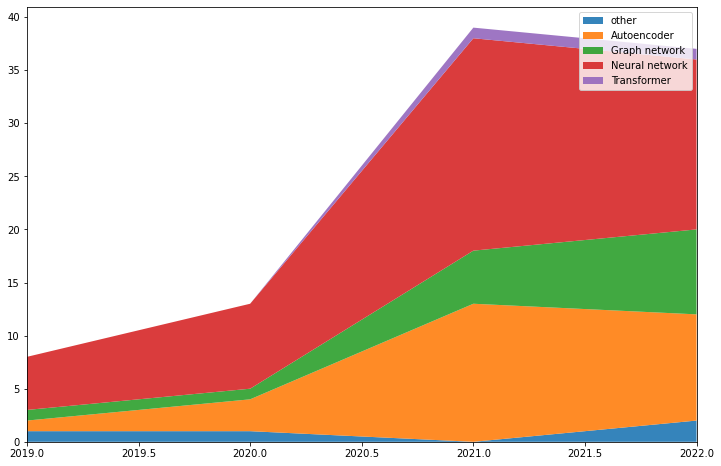

In [13]:
df = pd_table1[["Model architecture", "Year"]]
df["Model architecture"] = df['Model architecture'].str.split(', ')
df = df.explode(["Model architecture"])

''' Coarser '''
df.replace(model_categories, inplace=True)

a = df.value_counts(normalize=False)
a = a.unstack().T
a.replace(np.nan, 0, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.stackplot(a.index, a["other"], a["Autoencoder"], a["Graph network"], a["Neural network"], a["Transformer"], 
                labels=["other", "Autoencoder", "Graph network", "Neural network", "Transformer"],
                alpha=0.9)
ax.set_xlim(2019, 2022)
ax.legend()
plt.show()

In [14]:
a

Model architecture,Autoencoder,Graph network,Neural network,Transformer,other
Year,,,,,
1999,0.0,0.0,0.0,0.0,1.0
2002,0.0,0.0,0.0,0.0,1.0
2006,0.0,0.0,0.0,0.0,1.0
2007,0.0,0.0,0.0,0.0,1.0
2008,0.0,0.0,4.0,0.0,0.0
2017,0.0,0.0,1.0,0.0,0.0
2018,0.0,0.0,6.0,0.0,0.0
2019,1.0,1.0,5.0,0.0,1.0
2020,3.0,1.0,8.0,0.0,1.0


# Interpretability

## Active vs passive per model

In [15]:
df3 = pd_table1[["Model architecture"," Passive vs. Active Approaches"]].copy()
df3["Model architecture"] = df3['Model architecture'].str.split(', ')
df3[" Passive vs. Active Approaches"] = df3[' Passive vs. Active Approaches'].str.split(', ')
df3 = df3.explode(["Model architecture"])
df3 = df3.explode([" Passive vs. Active Approaches"])

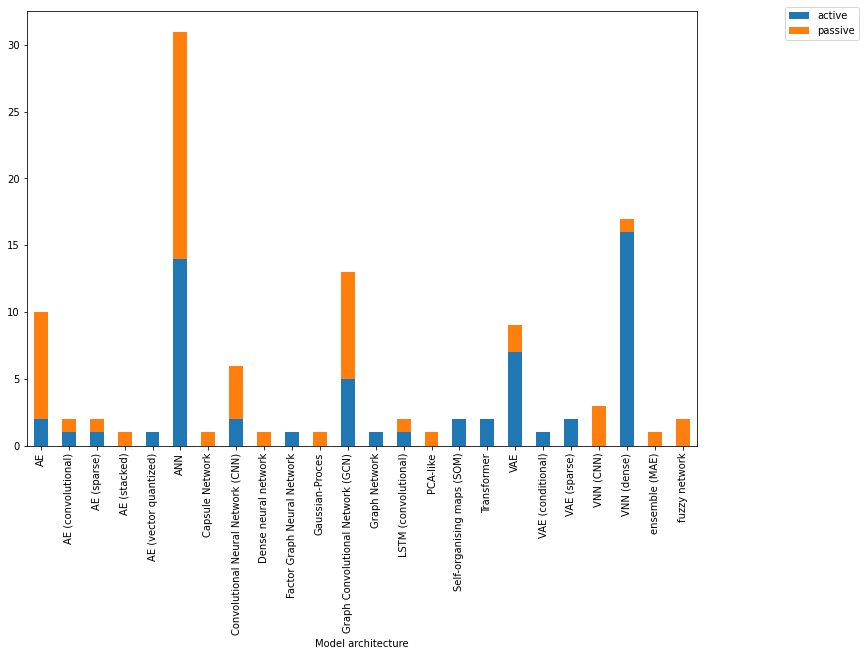

In [16]:
a = df3.value_counts(normalize=False)

fig, ax = plt.subplots(figsize=(12,8))
a.unstack().plot.bar(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.25, 1.02))

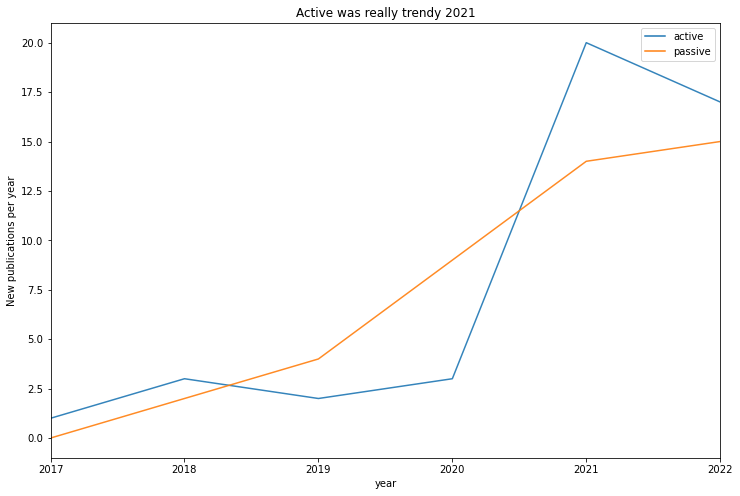

In [79]:
df3 = pd_table1[["Year"," Passive vs. Active Approaches"]].copy()
df3[" Passive vs. Active Approaches"] = df3[' Passive vs. Active Approaches'].str.split(', ')
df3 = df3.explode([" Passive vs. Active Approaches"])

''' Coarser '''
df3.replace(model_categories, inplace=True)

vc = df3.value_counts(normalize=False)
vc = vc.unstack()
vc.replace(np.nan, 0, inplace=True)
vc["year"]=vc.index
vc = vc.melt("year")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=vc, x="year", y="value", hue=vc.iloc[:,1],alpha=0.9, markers=True)
ax.set_xlim(2017, 2022)
ax.legend()
ax.set_title("Active was really trendy 2021")
ax.set_ylabel("New publications per year")
plt.show()

## Source of prior knowledge

- [ ] Active networks: most common source of prior knowledge? [Pie chart?]

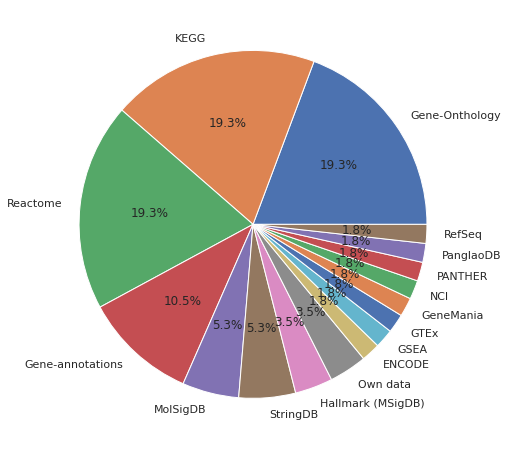

In [95]:
df = pd_table1[['Prior knowledge']].copy()
df['Prior knowledge'] = df['Prior knowledge'].str.split(', ')
df = df.explode(['Prior knowledge'])
df = df.value_counts()

labels=[ele[0].split("'")[0] for ele in df.keys().tolist()]

fig, ax  = plt.subplots(figsize=(8,8))
ax.pie(df.tolist(), labels=labels, autopct='%1.1f%%')
plt.show()

## Overview attribution methods 

In [10]:
pd_table1 = pd.read_csv("Table_2.csv")

In [13]:
# dict_attrMethods = {
#     "DeepLIFT":"backpropagation",
#     "LRP (Layerwise Relevance Propagation)":"backpropagation",
#     :"permutation",
#     :"attention"
# }

In [14]:
pd_table1.columns

Index(['Name', 'Year', 'Title', 'Research question', 'Data type',
       'Bulk/single cell', 'Which level', 'Model architecture',
       ' Passive vs. Active Approaches', 'Taxonomy (Table 3. Zhan et al)',
       'Post-hoc interpretation method', 'Interpretation strategy',
       'Prior knowledge', 'Computational resources used', 'Sample size',
       'Inputsize', 'handpicked', 'Advantage', 'Disadvantage', 'Notes'],
      dtype='object')

In [82]:
df_attr = pd_table1.loc[:,'Interpretation strategy'].copy()
df_attr = df_attr.str.split(', ', expand=True)
df_attr = pd.concat([df_attr[0], df_attr[1], df_attr[2], df_attr[3]], ignore_index=True)


df_attr.unique().tolist()


['connection-weights',
 'gradient-based',
 'permutation',
 'attention',
 'game theory',
 'visualisation',
 'prior knowledge',
 'perturbation',
 'other',
 'rule-extraction',
 'Feature selection',
 'rule-based propagation',
 nan,
 'visualize embedding',
 None,
 'saliency maps',
 'clustering',
 'pruning']

In [85]:
df_method = pd_table1.copy()

method = "gradient-based"

df_method = df_method[["Title", " Passive vs. Active Approaches", "Interpretation strategy","Post-hoc interpretation method"]][df_method["Interpretation strategy"].str.contains(method, case=False, na=False)]


In [86]:
df_method#["Post-hoc interpretation method"].value_counts()

,Title,Passive vs. Active Approaches,Interpretation strategy,Post-hoc interpretation method
2,Biologically informed deep neural network for ...,"active, passive","gradient-based, prior knowledge",DeepLIFT
8,A snapshot neural ensemble method for cancer-t...,passive,gradient-based,GradCAM
18,MetastaSite: Predicting metastasis to differen...,passive,gradient-based,DeepLIFT
29,Interpretable Autoencoders Trained on Single C...,passive,"gradient-based, saliency maps",NaN
32,LINA: A Linearizing Neural Network Architectur...,passive,"attention, gradient-based",LINA
34,XOmiVAE: an interpretable deep learning model ...,passive,"game theory, gradient-based","DeepSHAP, SHAP"
41,Verifying explainability of a deep learning ti...,passive,"game theory, gradient-based",SHAP
48,Explainable Deep Learning for Augmentation of ...,passive,gradient-based,DeepLIFT
54,Varmole: a biologically drop-connect deep neur...,"active, passive",gradient-based,Integrated gradients
61,deepManReg: a deep manifold-regularized learni...,passive,gradient-based,Integrated gradients
